# **MCF7 DropSeq**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from scipy.sparse import csr_matrix
from scipy.stats import skew, kurtosis

import matplotlib
import matplotlib.pyplot as plt

We perform some basic exploratory data analysis on our training dataset to better understand it and its characteristics.

In [2]:
dfn = pd.read_csv("MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [3]:
dfn.shape

(3000, 21626)

In [4]:
dfn.head()

"AAAAACCTATCG_Normoxia"  "AAAACAACCCTA_Normoxia"  \
"MALAT1"                         1                        3   
"MT-RNR2"                        0                        0   
"NEAT1"                          0                        0   
"H1-5"                           0                        0   
"TFF1"                           4                        1   

           "AAAACACTCTCA_Normoxia"  "AAAACCAGGCAC_Normoxia"  \
"MALAT1"                         3                        6   
"MT-RNR2"                        0                        2   
"NEAT1"                          0                        0   
"H1-5"                           0                        0   
"TFF1"                           1                        1   

           "AAAACCTAGCTC_Normoxia"  "AAAACCTCCGGG_Normoxia"  \
"MALAT1"                         4                        5   
"MT-RNR2"                        0                        0   
"NEAT1"                          0                        2   
"H1-5"                           0                        2   
"TFF1"                           0                        0   

           "AAAACTCGTTGC_Normoxia"  "AAAAGAGCTCTC_Normoxia"  \
"MALAT1"                         1                       13   
"MT-RNR2"                        2                        1   
"NEAT1"                          0                        1   
"H1-5"                           0                        0   
"TFF1"                           0                        2   

           "AAAAGCTAGGCG_Normoxia"  "AAAATCGCATTT_Normoxia"  ...  \
"MALAT1"                         3                        3  ...   
"MT-RNR2"                        7                        0  ...   
"NEAT1"                          2                        0  ...   
"H1-5"                           0                        0  ...   
"TFF1"                           0                        1  ...   

           "TTTTACAGGATC_Hypoxia"  "TTTTACCACGTA_Hypoxia"  \
"MALAT1"                        0                       2   
"MT-RNR2"                       0                       0   
"NEAT1"                         0                       0   
"H1-5"                          0                       1   
"TFF1"                          2                       3   

           "TTTTATGCTACG_Hypoxia"  "TTTTCCAGACGC_Hypoxia"  \
"MALAT1"                        1                       0   
"MT-RNR2"                       0                       0   
"NEAT1"                         0                       0   
"H1-5"                          0                       0   
"TFF1"                          8                       0   

           "TTTTCGCGCTCG_Hypoxia"  "TTTTCGCGTAGA_Hypoxia"  \
"MALAT1"                        1                       0   
"MT-RNR2"                       0                       0   
"NEAT1"                         0                       0   
"H1-5"                          1                       0   
"TFF1"                          0                       3   

           "TTTTCGTCCGCT_Hypoxia"  "TTTTCTCCGGCT_Hypoxia"  \
"MALAT1"                        1                       0   
"MT-RNR2"                       0                       0   
"NEAT1"                         0                       0   
"H1-5"                          0                       1   
"TFF1"                          4                       2   

           "TTTTGTTCAAAG_Hypoxia"  "TTTTTTGTATGT_Hypoxia"  
"MALAT1"                        0                       4  
"MT-RNR2"                       0                       0  
"NEAT1"                         0                       0  
"H1-5"                          0                       0  
"TFF1"                          6                       0  

[5 rows x 21626 columns]

In [5]:
dfn.describe()

"AAAAACCTATCG_Normoxia"  "AAAACAACCCTA_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.034000                 0.030333   
std                   0.277254                 0.220823   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   4.000000                 4.000000   

       "AAAACACTCTCA_Normoxia"  "AAAACCAGGCAC_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.027000                 0.032333   
std                   0.195662                 0.233751   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   5.000000                 6.000000   

       "AAAACCTAGCTC_Normoxia"  "AAAACCTCCGGG_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.045333                 0.047333   
std                   0.246235                 0.299649   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   4.000000                 8.000000   

       "AAAACTCGTTGC_Normoxia"  "AAAAGAGCTCTC_Normoxia"  \
count              3000.000000              3000.000000   
mean                  0.030000                 0.027333   
std                   0.204403                 0.292030   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                   6.000000                13.000000   

       "AAAAGCTAGGCG_Normoxia"  "AAAATCGCATTT_Normoxia"  ...  \
count              3000.000000              3000.000000  ...   
mean                  0.032000                 0.027333  ...   
std                   0.281074                 0.237918  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                   7.000000                 6.000000  ...   

       "TTTTACAGGATC_Hypoxia"  "TTTTACCACGTA_Hypoxia"  "TTTTATGCTACG_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.052333                0.043667                0.033667   
std                  0.364654                0.244499                0.340449   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  7.000000                4.000000               10.000000   

       "TTTTCCAGACGC_Hypoxia"  "TTTTCGCGCTCG_Hypoxia"  "TTTTCGCGTAGA_Hypoxia"  \
count             3000.000000             3000.000000             3000.000000   
mean                 0.033000                0.025333                0.037000   
std                  0.302117                0.208261                0.286924   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%  

In [6]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, "MALAT1" to "SUDS3"
Columns: 21626 entries, "AAAAACCTATCG_Normoxia" to "TTTTTTGTATGT_Hypoxia"
dtypes: int64(21626)
memory usage: 495.0+ MB


We transpose our dataframe so that the rows represent cells and the columns genes, which will facilitate some parts of our analysis later on.

In [4]:
dfn_t = dfn.T

In [8]:
dfn_t.shape

(21626, 3000)

In [9]:
dfn_t.head()

"MALAT1"  "MT-RNR2"  "NEAT1"  "H1-5"  "TFF1"  \
"AAAAACCTATCG_Normoxia"         1          0        0       0       4   
"AAAACAACCCTA_Normoxia"         3          0        0       0       1   
"AAAACACTCTCA_Normoxia"         3          0        0       0       1   
"AAAACCAGGCAC_Normoxia"         6          2        0       0       1   
"AAAACCTAGCTC_Normoxia"         4          0        0       0       0   

                         "MT-RNR1"  "H4C3"  "GDF15"  "KRT81"  "MT-CO3"  ...  \
"AAAAACCTATCG_Normoxia"          0       0        0        0         0  ...   
"AAAACAACCCTA_Normoxia"          0       1        0        0         0  ...   
"AAAACACTCTCA_Normoxia"          0       0        0        0         0  ...   
"AAAACCAGGCAC_Normoxia"          0       1        0        0         0  ...   
"AAAACCTAGCTC_Normoxia"          0       0        0        0         1  ...   

                         "MROH1"  "SKIDA1"  "MICALL1"  "RARG"  "MYO1F"  \
"AAAAACCTATCG_Normoxia"        0         0          0       0        0   
"AAAACAACCCTA_Normoxia"        0         0          0       0        0   
"AAAACACTCTCA_Normoxia"        0         0          0       0        0   
"AAAACCAGGCAC_Normoxia"        0         0          0       0        0   
"AAAACCTAGCTC_Normoxia"        0         0          0       0        0   

                         "BRWD1-AS2"  "RPS19BP1"  "AUNIP"  "TNK2"  "SUDS3"  
"AAAAACCTATCG_Normoxia"            0           0        0       0        0  
"AAAACAACCCTA_Normoxia"            0           0        0       0        0  
"AAAACACTCTCA_Normoxia"            0           0        0       0        0  
"AAAACCAGGCAC_Normoxia"            0           0        0       0        0  
"AAAACCTAGCTC_Normoxia"            0           0        0       0        0  

[5 rows x 3000 columns]

In [10]:
dfn_t.describe()

"MALAT1"     "MT-RNR2"       "NEAT1"        "H1-5"        "TFF1"  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       3.634791      0.850458      0.136086      0.368862      1.799362   
std        6.837353      1.721088      0.643060      0.953887      2.486034   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      0.000000      0.000000      0.000000      1.000000   
75%        4.000000      1.000000      0.000000      0.000000      3.000000   
max      175.000000     32.000000     23.000000     22.000000     46.000000   

          "MT-RNR1"        "H4C3"       "GDF15"       "KRT81"      "MT-CO3"  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       0.291362      1.730972      0.011884      0.026912      0.105105   
std        0.740664      2.328460      0.189425      0.233430      0.387558   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      2.000000      0.000000      0.000000      0.000000   
max       16.000000     44.000000     20.000000     17.000000      5.000000   

       ...       "MROH1"      "SKIDA1"     "MICALL1"        "RARG"  \
count  ...  21626.000000  21626.000000  21626.000000  21626.000000   
mean   ...      0.008046      0.002035      0.003930      0.016138   
std    ...      0.092892      0.048995      0.065461      0.131046   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      2.000000      3.000000      2.000000      3.000000   

            "MYO1F"   "BRWD1-AS2"    "RPS19BP1"       "AUNIP"        "TNK2"  \
count  21626.000000  21626.000000  21626.000000  21626.000000  21626.000000   
mean       0.000971      0.000832      0.034172      0.002405      0.003884   
std        0.032598      0.028839      0.200548      0.053491      0.064395   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        2.000000      1.000000      4.000000      3.000000      2.000000   

            "SUDS3"  
count  21626.000000  
mean       0.088042  
std        0.323733  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000  

[8 rows x 3000 columns]

Next step is to check for any missing values and duplicates since occurance of errors is always a possibility.

In [11]:
dfn_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21626 entries, "AAAAACCTATCG_Normoxia" to "TTTTTTGTATGT_Hypoxia"
Columns: 3000 entries, "MALAT1" to "SUDS3"
dtypes: int64(3000)
memory usage: 495.6+ MB


We verify that all values are integers

In [12]:
dfn.isnull().sum().sum()

0

There are no missing values

In [5]:
duplicate_rows_tot = dfn_t.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot} duplicate rows.")

There are 0 duplicate rows.


In [14]:
duplicate_cols = dfn_t.T.duplicated(keep=False).sum()
print(f"There are {duplicate_cols} duplicate columns.")

There are 0 duplicate columns.


### Proportion of cell condition

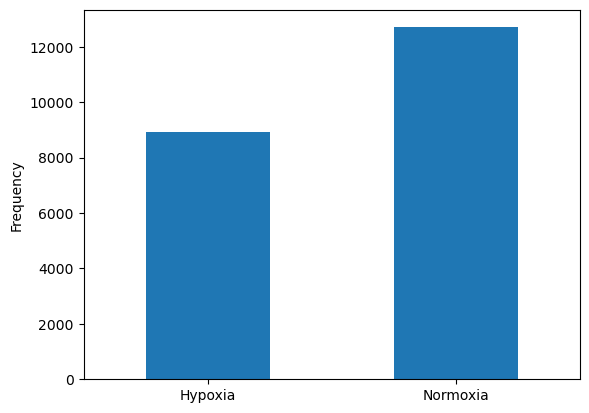

In [15]:
hypo_count = 0 
norm_count = 0
for cell in dfn.columns:
  if 'Hypoxia' in cell:
    hypo_count += 1
  else:
    norm_count += 1

s = pd.Series({"Hypoxia" : hypo_count, "Normoxia" : norm_count})
s.plot.bar(rot = 0)

plt.ylabel("Frequency")
plt.show()

We can assess that hypoxic cells are less than normoxic ones.

### Sparsity

Sparsity is a measure of the proportion of zero values in a dataset or matrix. It is typically calculated as the number of zero elements divided by the total number of elements in the dataset or matrix.
We decided to calculate it and to use a heatmap to visualize the sparsity of the dataset.

<Axes: >

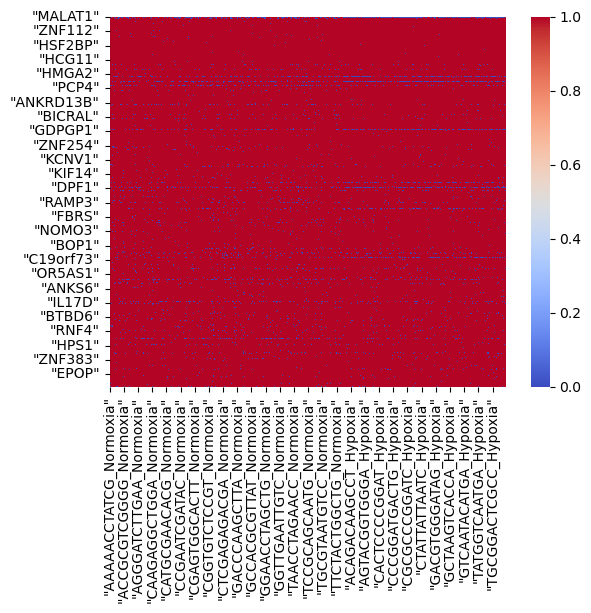

In [16]:
sns.heatmap(dfn == 0, cmap="coolwarm")

In [17]:
sparse_dfn = csr_matrix(dfn.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_dfn)

density_n = np.count_nonzero(sparse_dfn.toarray()) / np.prod(sparse_dfn.shape)
print(f"Sparsity: {1 - density_n:.2%}")

  (0, 0)	1
  (0, 1)	3
  (0, 2)	3
  (0, 3)	6
  (0, 4)	4
  (0, 5)	5
  (0, 6)	1
  (0, 7)	13
  (0, 8)	3
  (0, 9)	3
  (0, 10)	7
  (0, 11)	5
  (0, 12)	3
  (0, 13)	4
  (0, 14)	2
  (0, 15)	1
  (0, 16)	2
  (0, 17)	2
  (0, 18)	10
  (0, 19)	10
  (0, 20)	10
  (0, 21)	6
  (0, 22)	1
  (0, 23)	5
  (0, 24)	4
  :	:
  (2999, 21383)	1
  (2999, 21385)	1
  (2999, 21387)	1
  (2999, 21413)	1
  (2999, 21417)	1
  (2999, 21421)	1
  (2999, 21438)	1
  (2999, 21464)	1
  (2999, 21474)	1
  (2999, 21477)	1
  (2999, 21479)	2
  (2999, 21481)	1
  (2999, 21500)	1
  (2999, 21504)	1
  (2999, 21507)	1
  (2999, 21509)	1
  (2999, 21510)	1
  (2999, 21518)	1
  (2999, 21532)	1
  (2999, 21543)	1
  (2999, 21553)	1
  (2999, 21579)	1
  (2999, 21593)	2
  (2999, 21600)	1
  (2999, 21623)	1
Sparsity: 97.53%


The level of sparsity is 97.53% indicating that the data obtained using DropSeq is much more sparse than the SmartSeq

Sparse DropSeq data can be expected too be more sparse because of the sequencing technique, which involves encapsulating individual cells in nanoliter-sized droplets and then sequencing the RNA from each droplet separately. Since each droplet contains only a single cell, the resulting sequencing data is inherently sparse and so the sequencing reads for each gene are only observed in a subset of the cells.

### Skewness and Kurtosis

As is SmartSeq dataset analysis we now proceed to examine skewness and kurtosis. Skweness is the measure of the lack of symmetry in the data set, and kurtosis is the measure of peakness of distribution

Text(0.5, 1.0, 'Distribution of skewness values for genes')

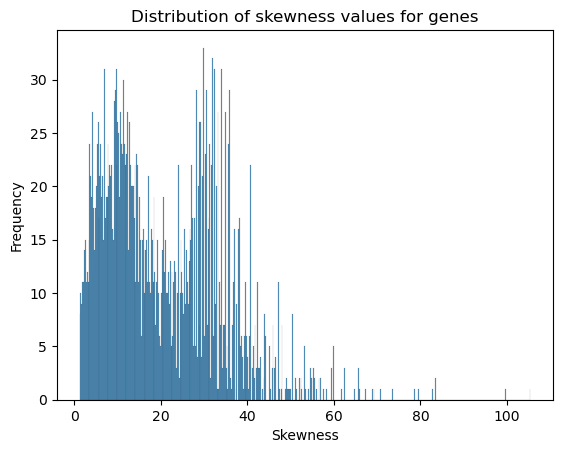

In [6]:
column_num = np.shape(dfn)[1]
cells_n = list(dfn.columns)

skewness = dfn.apply(skew, axis=1)
sns.histplot(skewness, bins=500)  # skewness of genes
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of skewness values for genes')

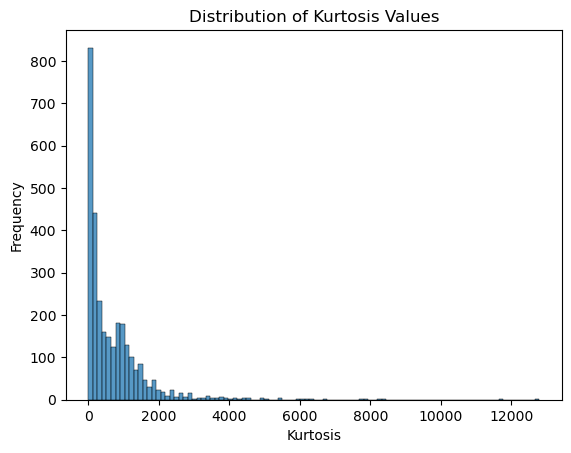

In [7]:
kurt = kurtosis(dfn, axis=1)

sns.histplot(kurt, bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.title('Distribution of Kurtosis Values')
plt.show()

The resulting histograms show the distribution of the skewness and kurtosis values across all cells, allowing us to get a sense of the overall shape of the gene expression profiles in the dataset.
It is clear how the skewness histogram is right skewed and the kurtosis histogram is leptokurtic, indicating that many cells have highly variable expression profiles with both high peaks and long tails. 

### Distribution

Let's perform some additional plots to have an idea of the distribution of the dataset.

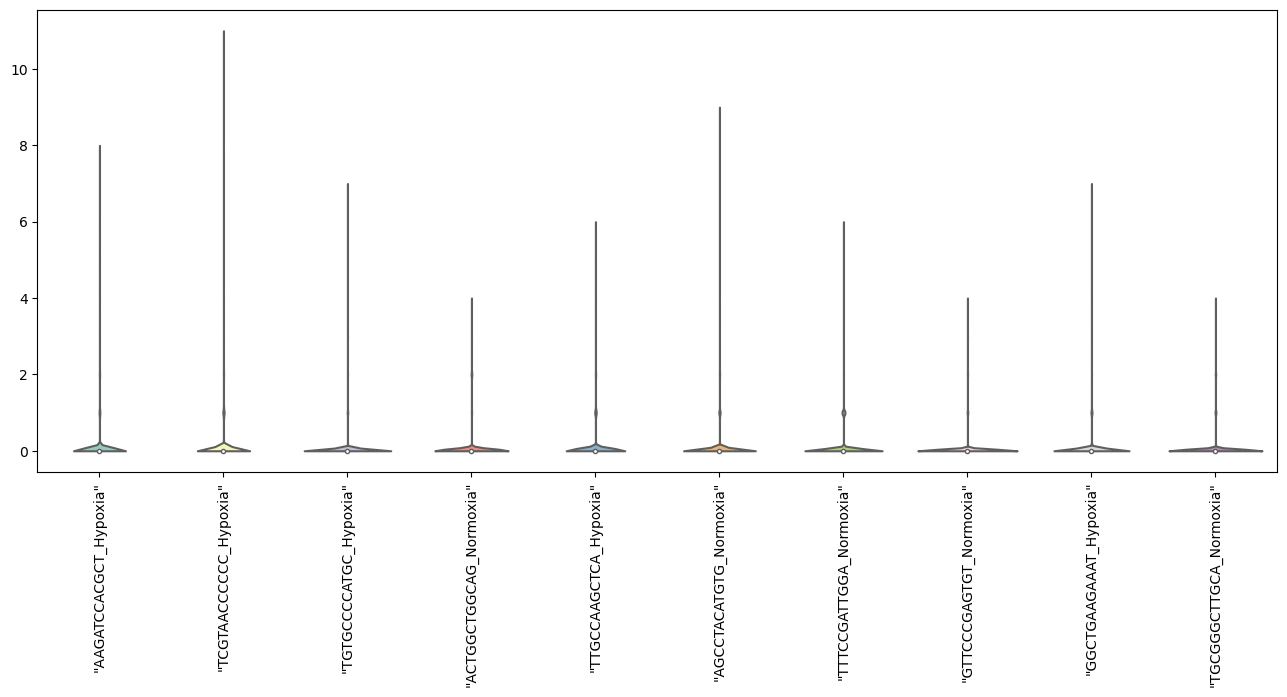

In [20]:
n = 10
random_cells_n = np.random.choice(dfn.columns, size=n, replace=False)
plt.figure(figsize=(16,6))
violin_plot = sns.violinplot(data=dfn[random_cells_n], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

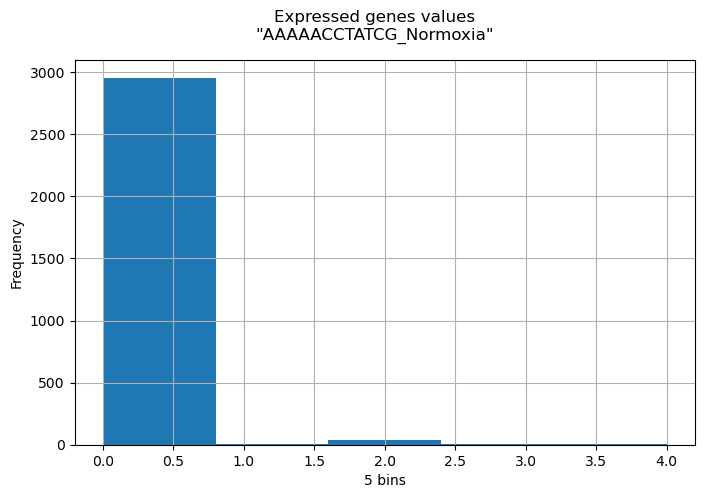

In [8]:
#histogram of a single column
col = dfn.iloc[:, 0]
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
col.hist(bins=5)
plt.suptitle(f"Expressed genes values\n{col.name}")
axs.set_xlabel("5 bins")
axs.set_ylabel("Frequency")
plt.show()


So we see that the distributions are highly non-normal, very skewed with heavy tails.

### Correlation

Now we want to check correlation between samples using the Pearson correlation coefficient

In [9]:
dfn.shape[0]

3000

In [10]:
#pearson correlation coefficient
random.seed(42)
random_columns = [i for i in range(0,dfn.shape[0])]
random.shuffle(random_columns)

corr_matrix_p = dfn.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 250 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of cells included: ", np.shape(corr_matrix_p))
print("Average between minimum and maximum correlation: ", average)
print("Average correlation of expression profiles between genes: ", corr_matrix_p.mean().mean())

Number of cells included:  (1000, 1000)
Average between minimum and maximum correlation:  0.49272467710631324
Average correlation of expression profiles between genes:  0.26583308782243453


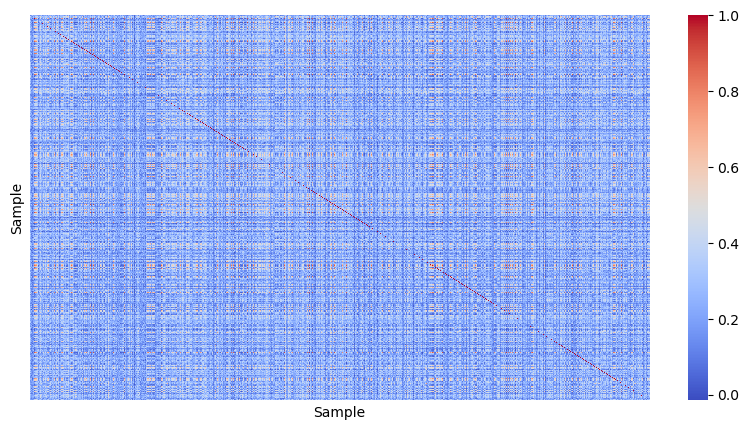

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

From the plot and the values we obtain we can observe that the dataset is poorly correlated.

### Non-zero Gene Expression

Now we want to investigate the distribution of non-zero values.

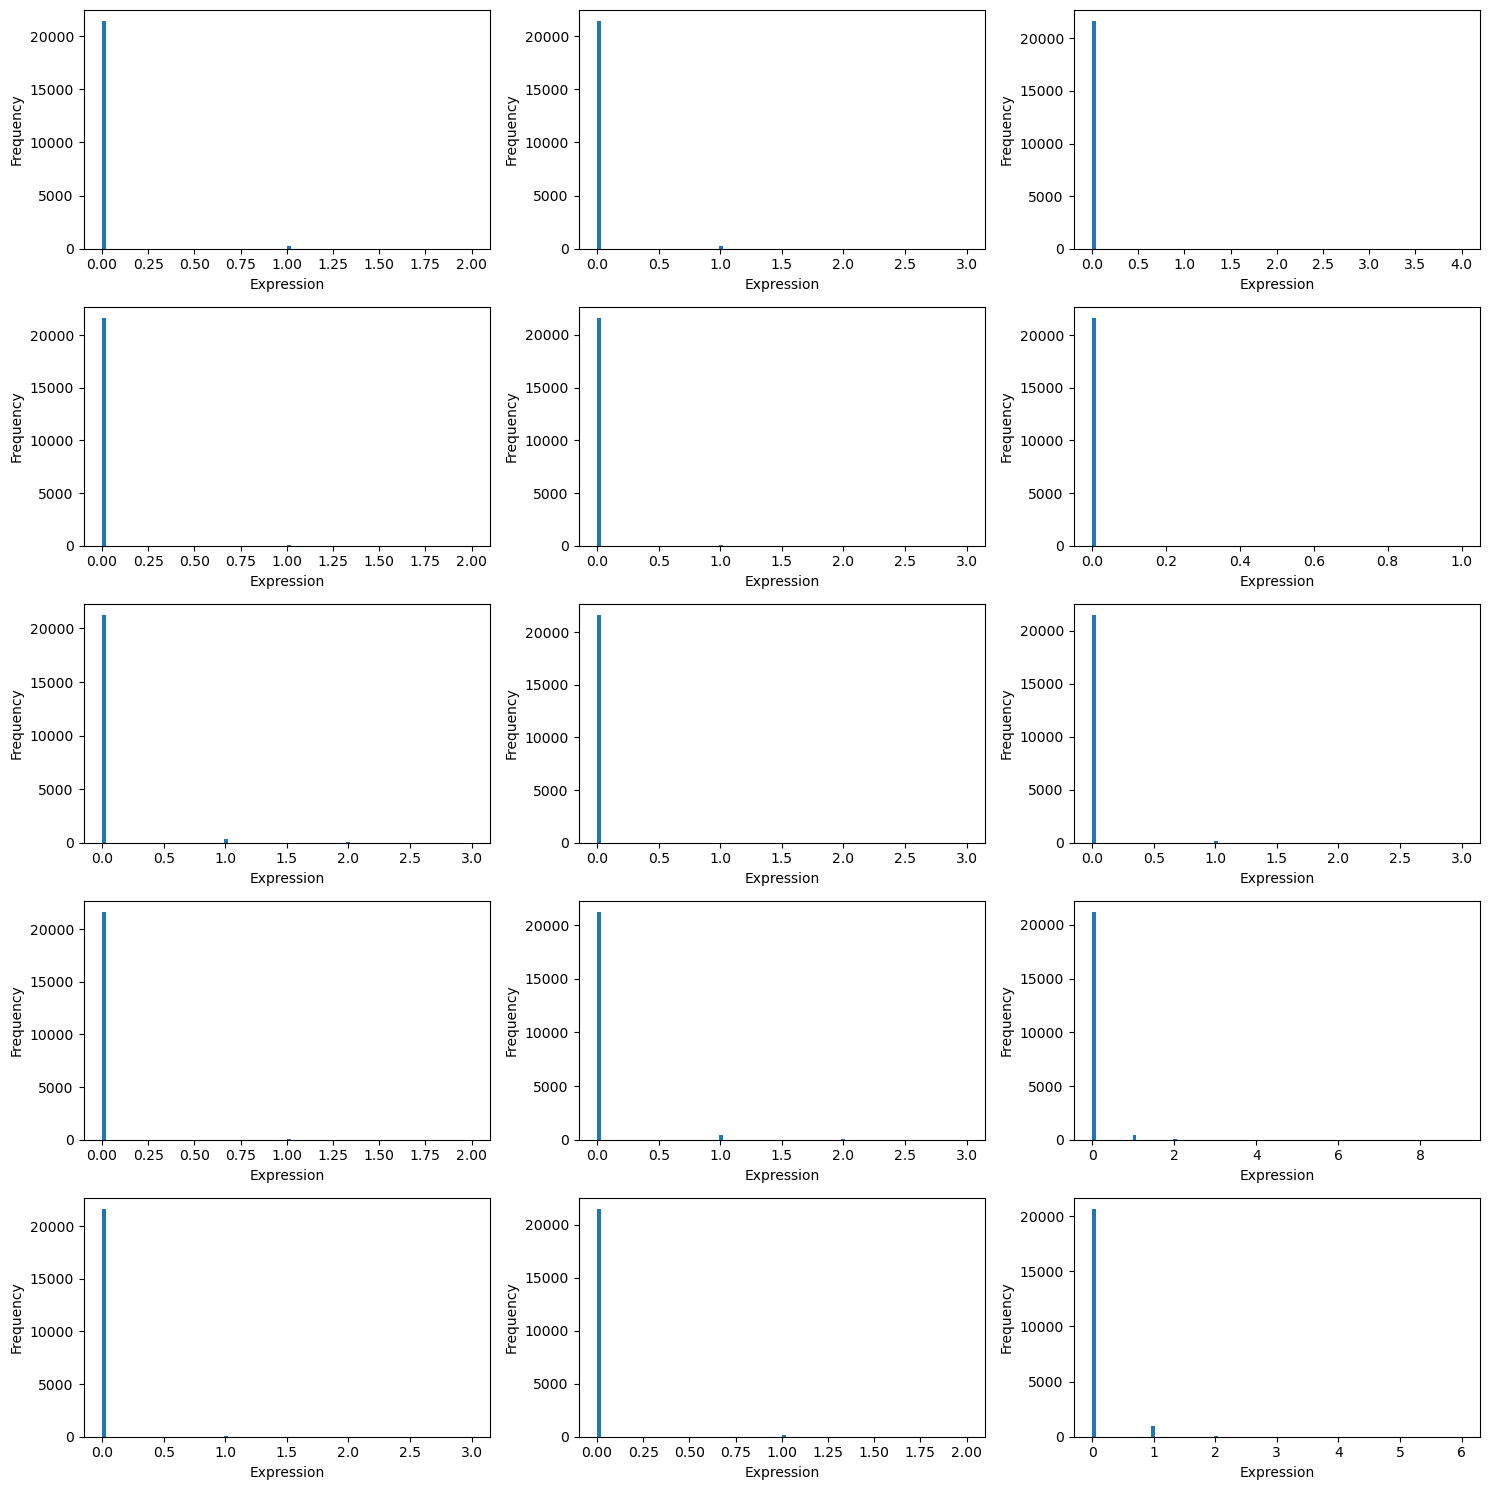

In [25]:
data = dfn.T
data = data.loc[(data!=0).any(axis=1), :]
genes = np.random.choice(data.columns, size=15, replace=False)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for i, gene in enumerate(genes):
    gene_data= data[gene]
    row_num= i//3
    col_num= i%3
    ax[row_num, col_num].hist(gene_data, bins=100)
    ax[row_num, col_num].set_xlabel('Expression')
    ax[row_num, col_num].set_ylabel('Frequency')
fig.tight_layout()
plt.show()

We notice a unimodal behaviour in all of the cases (meaning that the data has a single peak) just as it had in smartseq. Therefore, the distribution is either Poisson or Negative Binomial. 

Text(0, 0.5, 'Variance')

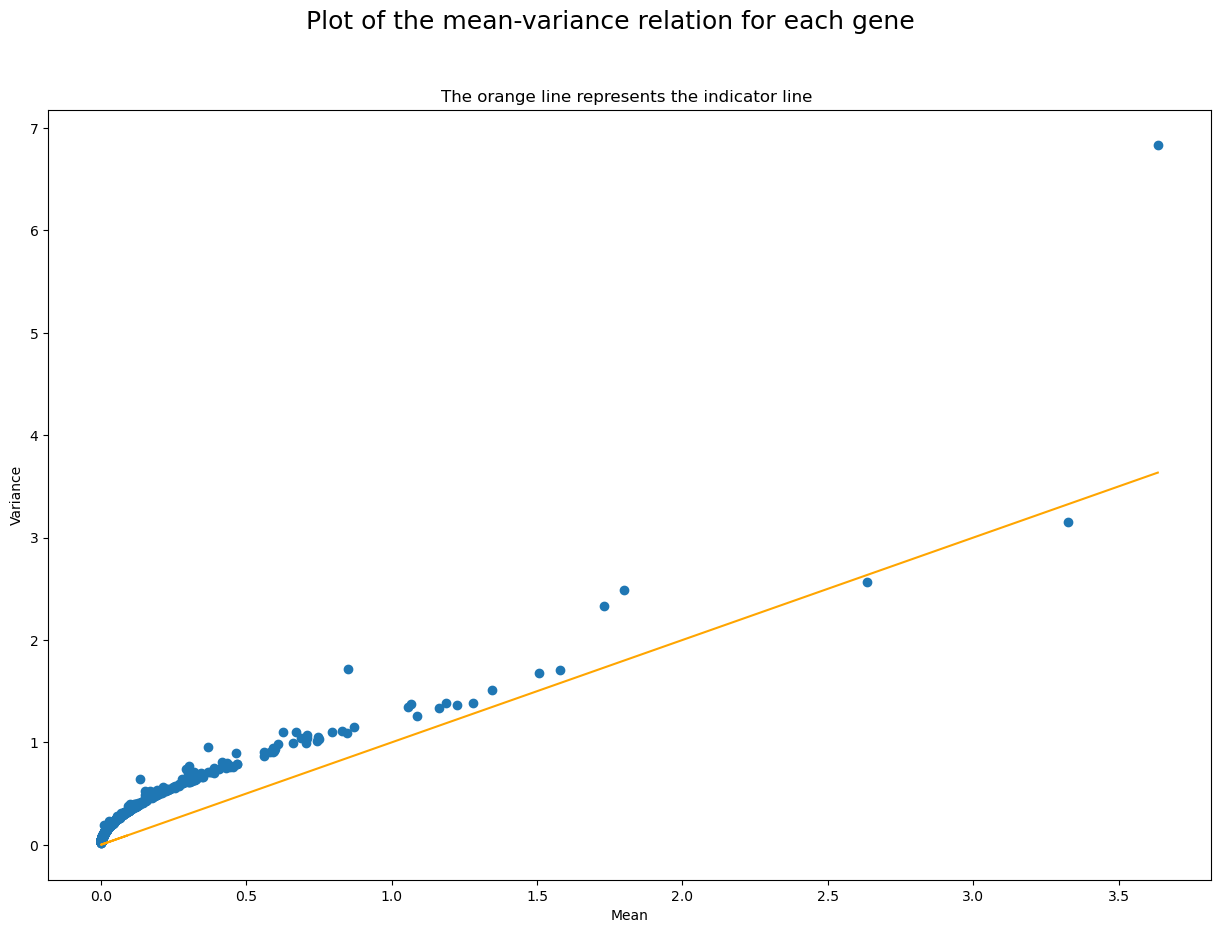

In [11]:
mean_vector = dfn_t.describe().iloc[1,:]
var_vector = dfn_t.describe().iloc[2,:]
plt.figure(figsize=(15, 10))
plt.scatter(mean_vector, var_vector)
plt.plot(mean_vector, mean_vector, color = "orange")
plt.title("The orange line represents the indicator line ", fontsize = 12)
plt.suptitle("Plot of the mean-variance relation for each gene", fontsize = 18)
plt.xlabel("Mean")
plt.ylabel("Variance")

In order to be more precise, we will plot the variance-mean relationship after applying the logarithmic scale.

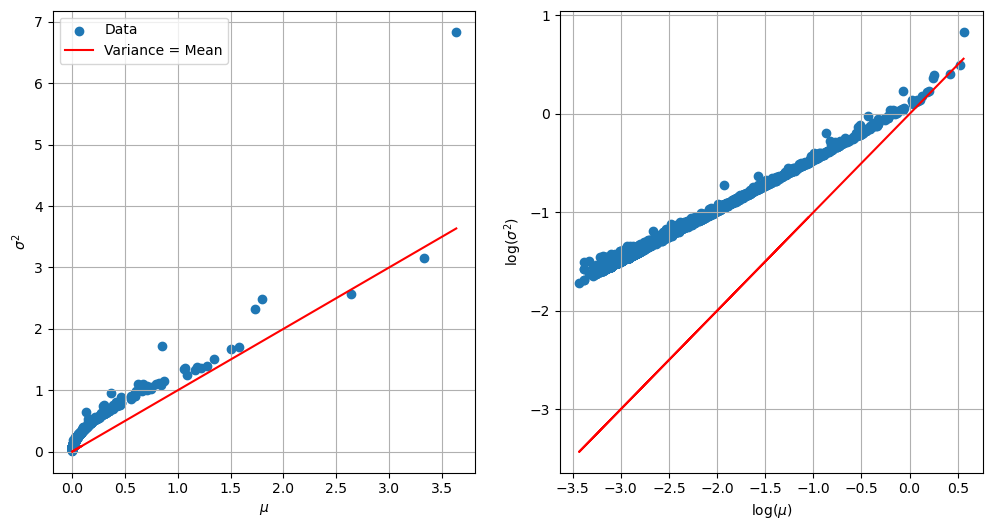

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot without logarithmic scale
ax[0].scatter(mean_vector, var_vector, label="Data")
ax[0].set_xlabel("$\mu$")
ax[0].set_ylabel("$\sigma^2$")
ax[0].grid(True)
ax[0].plot(mean_vector, mean_vector, color='r', label="Variance = Mean")
ax[0].legend()

# Scatter plot with logarithmic scale
ax[1].scatter(np.log10(mean_vector), np.log10(var_vector), label="Data")
ax[1].set_xlabel("$\log(\mu)$")
ax[1].set_ylabel("$\log(\sigma^2)$")
ax[1].grid(True)
ax[1].plot(np.log10(mean_vector), np.log10(mean_vector), color='r', label="Variance = Mean")

plt.show()

The relationship is clearly not linear so we conclude that the distribution is Negative Binomial.

## Filtering

Filtering based on total read counts involves setting a threshold on the total number of reads (or counts) for each cell. Cells with counts below the threshold are typically considered to have low sequencing depth and may be filtered out from further analysis. This type of filtering aims to remove cells with low library sizes or poor quality data.

Filtering based on the number of non-zero genes, on the other hand, involves setting a threshold on the number of genes that have non-zero counts for each cell. Cells with a low number of expressed genes below the threshold may be considered low-quality or uninformative and can be excluded from downstream analysis.

While both filtering approaches can help remove low-quality or uninformative cells, they capture different aspects of the data. Filtering based on total read counts focuses on the overall sequencing depth of each cell, while filtering based on the number of non-zero genes examines the transcriptional activity and the diversity of expressed genes within each cell.

In [12]:
total_counts = np.sum(dfn, axis=0)

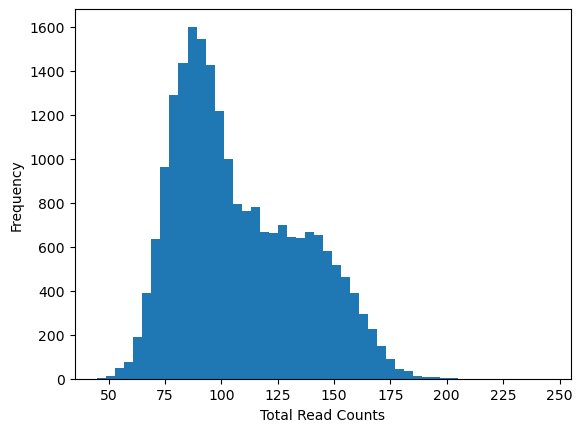

In [13]:
plt.hist(total_counts, bins=50)

plt.xlabel('Total Read Counts')
plt.ylabel('Frequency')

plt.show()

We can set the threshold at 65

In [14]:
dfn_filtered = dfn.loc[:, total_counts >= 65]

Now for the non-zero genes

In [15]:
nonzero_counts = np.count_nonzero(dfn_filtered, axis=0)

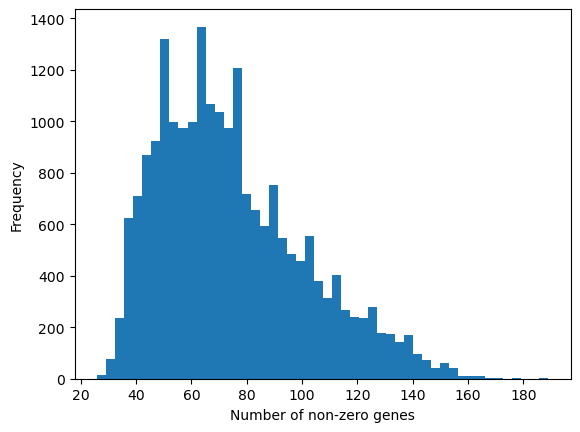

In [16]:
plt.hist(nonzero_counts, bins=50)
plt.xlabel('Number of non-zero genes')
plt.ylabel('Frequency')
plt.show()

We set the threshold at 35

In [17]:
dfn_filtered = dfn_filtered.loc[:, nonzero_counts >= 35]

In [18]:
dfn_filtered

"AAAAACCTATCG_Normoxia"  "AAAACAACCCTA_Normoxia"  \
"MALAT1"                           1                        3   
"MT-RNR2"                          0                        0   
"NEAT1"                            0                        0   
"H1-5"                             0                        0   
"TFF1"                             4                        1   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACACTCTCA_Normoxia"  "AAAACCAGGCAC_Normoxia"  \
"MALAT1"                           3                        6   
"MT-RNR2"                          0                        2   
"NEAT1"                            0                        0   
"H1-5"                             0                        0   
"TFF1"                             1                        1   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACCTAGCTC_Normoxia"  "AAAACCTCCGGG_Normoxia"  \
"MALAT1"                           4                        5   
"MT-RNR2"                          0                        0   
"NEAT1"                            0                        2   
"H1-5"                             0                        2   
"TFF1"                             0                        0   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAACTCGTTGC_Normoxia"  "AAAAGAGCTCTC_Normoxia"  \
"MALAT1"                           1                       13   
"MT-RNR2"                          2                        1   
"NEAT1"                            0                        1   
"H1-5"                             0                        0   
"TFF1"                             0                        2   
...                              ...                      ...   
"BRWD1-AS2"                        0                        0   
"RPS19BP1"                         0                        0   
"AUNIP"                            0                        0   
"TNK2"                             0                        0   
"SUDS3"                            0                        0   

             "AAAAGCTAGGCG_Normoxia"  "AAAATCGCATTT_Normoxia"  ...  \
"MALAT1"                           3                        3  ...   
"MT-RNR2"                          7                        0  ...   
"NEAT1"                            2                        0  ...   
"H1-5"                             0                        0  ...   
"TFF1"                             0                        1  ...   
...                              ...                      ...  ...   
"BRWD1-AS2"                        0                        0  ...   
"RPS19BP1"                         0                        0  ...   
"AUNIP"                            0                        0  ...   
"TNK2"                             0                        0  ...   
"SUDS3"                            0                        0  ...   

             "TTTTACAGGATC_Hypoxia"  "TTTTACCACG

In [19]:
dfn = dfn_filtered.copy()

## PCA

As in all other data sets, we will first apply standard scaler and then perform PCA.

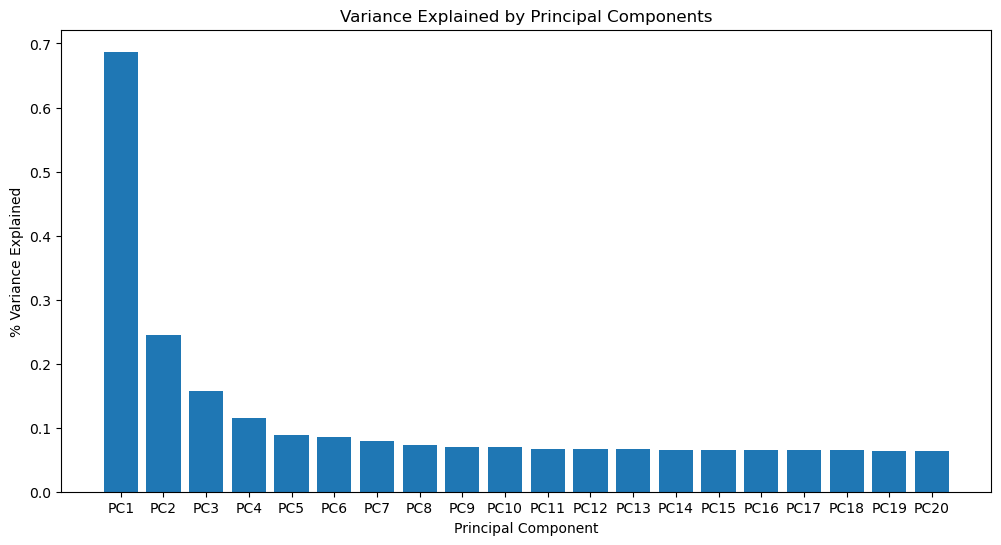

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df_standardized = pd.DataFrame(StandardScaler().fit_transform(dfn_filtered.transpose()), columns=dfn_filtered.transpose().columns, index=dfn_filtered.T.index)

pca_20 = PCA(n_components=20)
pca_20.fit(df_standardized)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

We can see from the histogram above that only around 1% of the variance is explained by the first two principle components. We will now do the plots in order to visualize the data. 

In [21]:
conditions = []
for cell in dfn.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")

In [22]:
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(df_standardized)
fig = px.scatter(components, x=0, y=1, color=conditions)
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='2D PCA Scatter Plot'
)
fig.show()

In [23]:
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(df_standardized)

total_var = pca_3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Clearly, the data is not linearly separable. 

## Clustering

As for SmartSeq we will use `KMeans()` in order to do clustering. The reason behind this choice is that this unsupervised clustering technique is able to handle large datasets.

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [41]:
Labels=pd.Series(df_standardized.index, index= df_standardized.index)
hypo_labels = Labels.str.contains('Hypo')
norm_labels = Labels.str.contains('Norm')


Labels[hypo_labels] = 'hypoxia'
Labels[norm_labels] = 'normoxia'

We have to apply PCA to the data set before clustering.

In [42]:
pca = PCA(n_components=2)  # or however many components you want to keep
pca_df = pca.fit_transform(df_standardized)

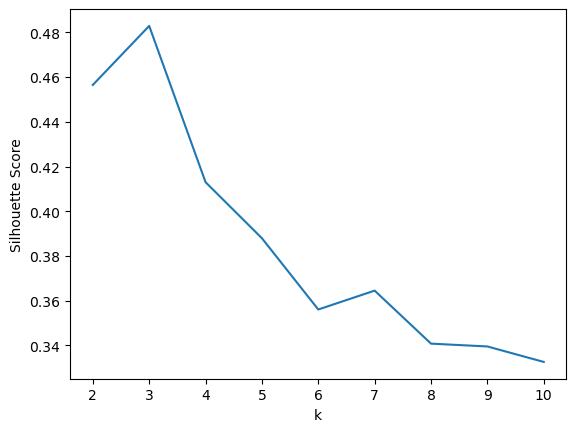

In [43]:
# Find the best k using the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for various k values
plt.plot(k_values, silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

Since the silhouette score is the highest when k=3, we should choose that value as the number of clusters. However we tried, for curiosity, to run the algorithm with k = 2 and the accuracy of the output turned out to be higher, so we keep the latter. 

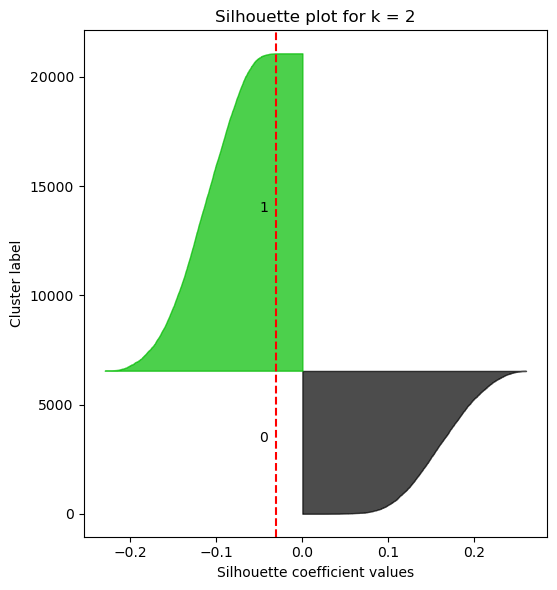

In [44]:
import matplotlib.gridspec as gridspec

k = 2

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(df_standardized)
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df_standardized, cluster_labels)
sample_silhouette_values = silhouette_samples(df_standardized, cluster_labels)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 4])

# Silhouette plot
ax1 = plt.subplot(gs[0])
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title(f"Silhouette plot for k = {k}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.tight_layout()
plt.show()

In [45]:
# Count the number of cells in each cluster
counts = np.bincount(kmeans.labels_)

# Print the counts
for i, count in enumerate(counts):
    print(f"Cluster {i} has {count} cells")

Cluster 0 has 6535 cells
Cluster 1 has 14524 cells


In [46]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(pca_df)
cluster_labels = kmeans.labels_

# Convert the official labels to numeric form for comparison
true_labels_numeric = Labels.replace({'hypoxia': 0, 'normoxia': 1})

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(true_labels_numeric, cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.4786234230575842


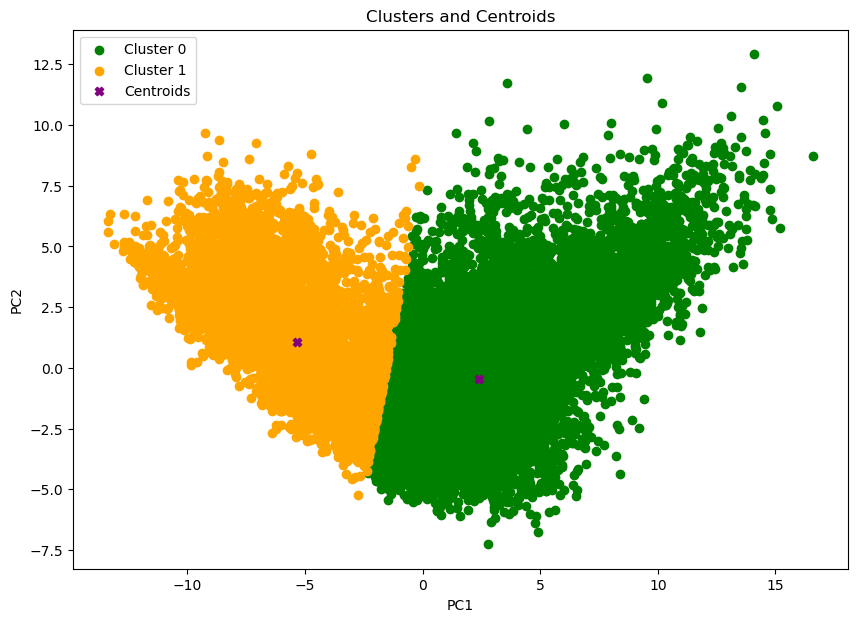

In [47]:
# Plotting the Centroids
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 7))
for label, color in zip(set(cluster_labels), ['green', 'orange']):
    mask = cluster_labels == label
    plt.scatter(pca_df[mask, 0], pca_df[mask, 1], c=color, label=f'Cluster {label}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='purple', marker='X', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Supervised Learning

As we have seen in the begining of the notebook, this data set has around 21000 samples. If we directly implement the same pipeline we have used in the case of SmartSeq the computations will take too much time. For that reason we will implement only some models such as 'SVM', 'Linear SVM', 'Logistic', 'SGD', and 'Random forest' using the best parameters we have found by implementing GridSearchCV() in the SmartSeq experiment data set. 

In [24]:
df_test = pd.read_csv('MCF7_Filtered_Normalised_3000_Data_test_anonim.txt', delimiter="\ ", engine='python', index_col=0)

In [25]:
conditions = []
for cell in dfn.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")

In [26]:
# Convert target variable to binary encoding
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

# define train and test data
X_train = dfn.T
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC(C=0.001, gamma=0.001, kernel= 'linear'))   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC(loss='hinge', penalty="l2")) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression(C=0.001, penalty='l2', solver="lbfgs"))
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier(alpha=1e-05, eta0=10, learning_rate='invscaling', loss='log_loss', penalty='l2'))
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=30))
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))


+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------+------------+-------------+----------+------------|
|  0 | svm           |   0.974026 |    0.972824 | 0.964749 |   0.96877  |
|  1 | linear_svm    |   0.960397 |    0.944593 | 0.961565 |   0.953003 |
|  2 | logistic      |   0.978632 |    0.986247 | 0.962247 |   0.974099 |
|  3 | sgd           |   0.955696 |    0.933556 | 0.955424 |   0.944363 |
|  4 | random_forest |   0.960302 |    0.985826 | 0.917444 |   0.950406 |
+----+---------------+------------+-------------+----------+------------+


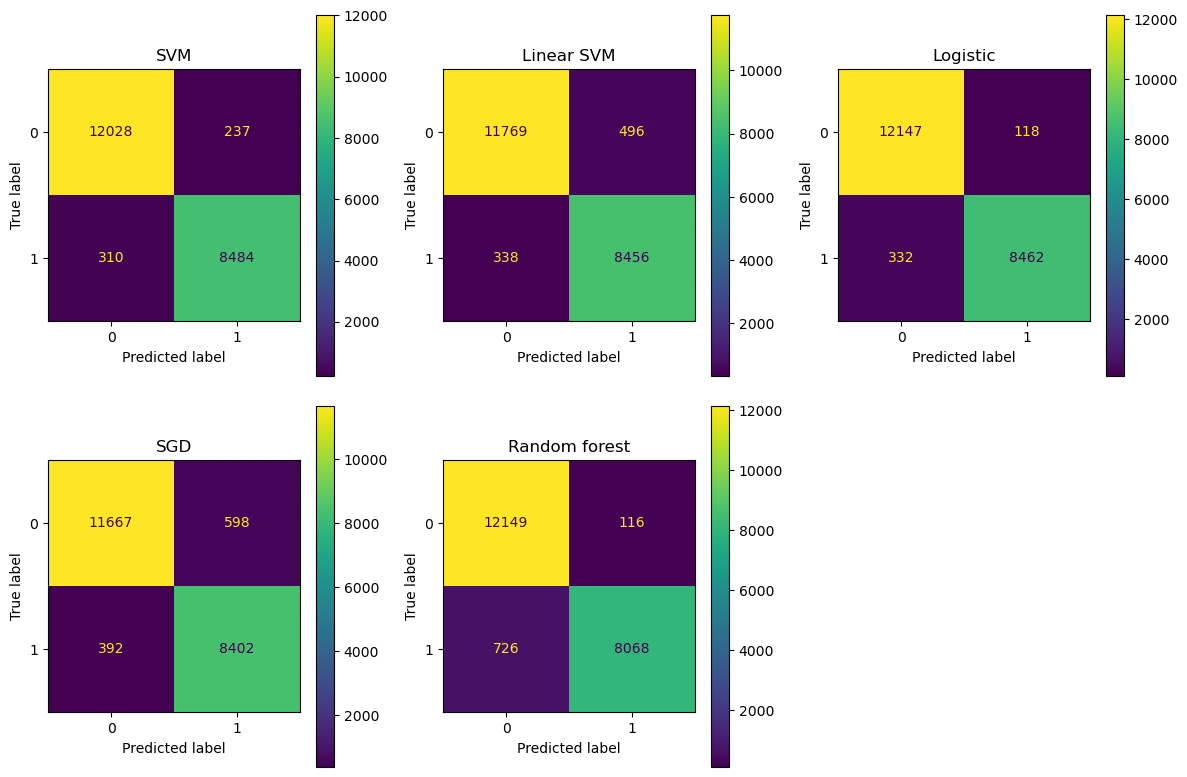

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

As a next step, we will try to reduce dimension using PCA and then again apply the pipeline. 

In [28]:
pca = PCA(n_components=0.90)
arr_pca = pca.fit_transform(dfn.T)
arr_pca.shape

(21059, 406)

In [29]:
dfn_pca = pd.DataFrame(arr_pca, index=dfn.T.index)
dfn_pca.head()

0         1         2         3         4    \
"AAAAACCTATCG_Normoxia" -2.397907 -1.014259 -0.749562 -1.783223  2.287816   
"AAAACAACCCTA_Normoxia"  0.087652 -2.033078  0.617221 -0.520580  0.718811   
"AAAACACTCTCA_Normoxia"  0.189905 -2.302473  2.902557 -0.401520  1.421401   
"AAAACCAGGCAC_Normoxia"  3.500970 -2.679042  2.501331  0.392257  0.826801   
"AAAACCTAGCTC_Normoxia"  1.877865 -3.756491  0.009816 -2.169758 -0.193715   

                              5         6         7         8         9    \
"AAAAACCTATCG_Normoxia"  0.555054  0.174772 -2.667984  2.479711  1.012643   
"AAAACAACCCTA_Normoxia" -1.798769  0.729271 -0.921794 -0.388575 -0.905271   
"AAAACACTCTCA_Normoxia" -0.886858 -0.897129 -0.909914 -0.865080 -1.699783   
"AAAACCAGGCAC_Normoxia"  0.961499 -0.229144 -0.268519  0.203642 -0.673967   
"AAAACCTAGCTC_Normoxia" -0.814257 -0.268831 -1.073446 -0.824832 -0.731899   

                         ...       396       397       398       399  \
"AAAAACCTATCG_Normoxia"  ... -0.114434 -0.256840 -0.074918 -0.337073   
"AAAACAACCCTA_Normoxia"  ...  0.085643 -0.169566  0.176412 -0.378000   
"AAAACACTCTCA_Normoxia"  ... -0.573837  0.116741  0.070456 -0.188980   
"AAAACCAGGCAC_Normoxia"  ...  0.175531  0.109493 -0.269886  0.174476   
"AAAACCTAGCTC_Normoxia"  ... -0.073888  0.022162  0.574040  0.333607   

                              400       401       402       403       404  \
"AAAAACCTATCG_Normoxia"  0.049337 -0.347618  0.120997  0.546791 -0.616832   
"AAAACAACCCTA_Normoxia" -0.154242  0.382357  0.256119  0.018667  0.125125   
"AAAACACTCTCA_Normoxia" -0.020685  0.160732  0.486668  0.198228  0.161393   
"AAAACCAGGCAC_Normoxia"  0.032771 -0.333480 -0.104834  0.230056  0.185140   
"AAAACCTAGCTC_Normoxia"  0.263890  0.029510 -0.497821 -0.011915  0.372647   

                              405  
"AAAAACCTATCG_Normoxia"  0.223727  
"AAAACAACCCTA_Normoxia"  0.002861  
"AAAACACTCTCA_Normoxia" -0.183445  
"AAAACCAGGCAC_Normoxia"  0.219682  
"AAAACCTAGCTC_Normoxia" -0.651707  

[5 rows x 406 columns]

As we can see, PCA for 90% explained variance selected 406 principal components. Now we try to run the pipeline again. 

In [30]:
# define train and test data
X_train = dfn_pca
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC(C=0.001, gamma=0.001, kernel= 'linear'))   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC(loss='hinge', penalty="l2")) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression(C=0.001, penalty='l2', solver="lbfgs"))
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier(alpha=1e-05, eta0=10, learning_rate='invscaling', loss='log_loss', penalty='l2'))
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=30))
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+---------------+------------+-------------+----------+------------+
|    | Model         |   Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------+------------+-------------+----------+------------|
|  0 | svm           |   0.979771 |    0.985834 | 0.965431 |   0.975526 |
|  1 | linear_svm    |   0.977397 |    0.973511 | 0.973732 |   0.973621 |
|  2 | logistic      |   0.977065 |    0.991717 | 0.953036 |   0.971992 |
|  3 | sgd           |   0.972886 |    0.968317 | 0.969638 |   0.968977 |
|  4 | random_forest |   0.929484 |    0.946267 | 0.879122 |   0.91146  |
+----+---------------+------------+-------------+----------+------------+


The model with best performance is SVM applied to data on which PCA was used, therefore that is what we will use as a model to do predictions. 

# **Predictions**

In [31]:
conditions = []
for cell in dfn_pca.T.columns:
    if "Hypoxia" in cell:
        conditions.append("Hypoxia")
    else:
        conditions.append("Normoxia")

In [32]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [34]:
df_test = pd.read_csv("MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ", engine='python', index_col=0)
arr_pca_test = pca.transform(df_test.T)

df_pca_test = pd.DataFrame(arr_pca_test, index=df_test.T.index)

X_train = dfn_pca
y_train = target_binary
X_test = df_pca_test

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.svm import SVC
best_model = SVC(C=0.001, gamma=0.001, kernel='linear')

In [37]:
best_model.fit(X_train_scaled, y_train)
predictions = best_model.predict(X_test_scaled)

In [38]:
final_predictions = []

for i in predictions:
    if i==1:
        final_predictions.append('Hypoxia')
    else:
        final_predictions.append('Normoxia')


In [39]:
np.savetxt('MCF7_DropS_Predictions.txt', final_predictions, fmt='%s')